In [2]:
import cv2 as cv
import pandas as pd
import numpy as np
import glob
import sys
import random
import xml.etree.ElementTree as ET
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
#config dictionary
config_dictionary ={"Image_set":"C:\\Users\\sande\\OneDrive\\Desktop\\Data_mining\\Images\\",
                    "bread_info":["n02085936-Maltese_dog","n02096294-Australian_terrier",\
                                  "n02106550-Rottweiler","n02092339-Weimaraner"]
                 }
    

In [4]:
#file lister
files_dict={}
for bread in config_dictionary['bread_info']:
    files_dict[bread]=glob.glob(config_dictionary['Image_set']+bread+"/*.jpg")
    #removing un-wanted files in image folders
    if '.DS_Store' in files_dict[bread]:
            files_dict[bread].remove('.DS_Store')

In [6]:
# image modification
modify_dict ={}
for bread in list(files_dict.keys()):
    for file in files_dict[bread]:
        annotation_path = file.replace("Images","Annotation")
        annotation_path=annotation_path.split(".")[0]
        tree = ET.parse(annotation_path)
        root = tree.getroot()
        objects = root.findall('object')
        bbox = []
        for o in objects:
            bndbox = o.find('bndbox')
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)
            bbox.append((xmin,ymin,xmax,ymax))
        image = Image.open(file)
        for value in range(len(bbox)):
            cropped_image = image.crop(bbox[value])
            modified_image = cropped_image.resize((100,100),Image.ANTIALIAS)
            modified_image = modified_image.convert('RGB')
            temp = "\\".join(file.split("\\")[:-1])
            temp+="\\cropped_images\\"
            Path(temp).mkdir(parents=True, exist_ok=True)
            modified_image.save(temp+file.split("\\")[-1])

C:\Users\sande\AppData\Local\Temp\ipykernel_15244\3919825018.py:21: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  modified_image = cropped_image.resize((100,100),Image.ANTIALIAS)


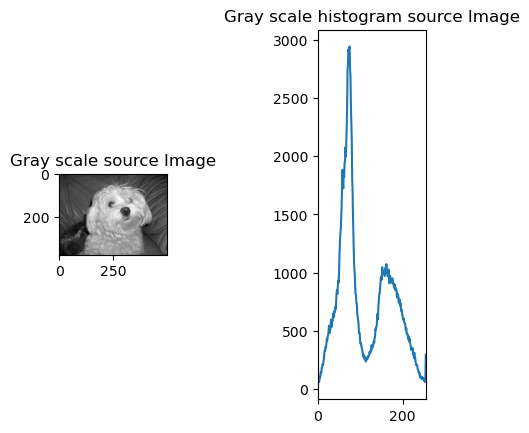

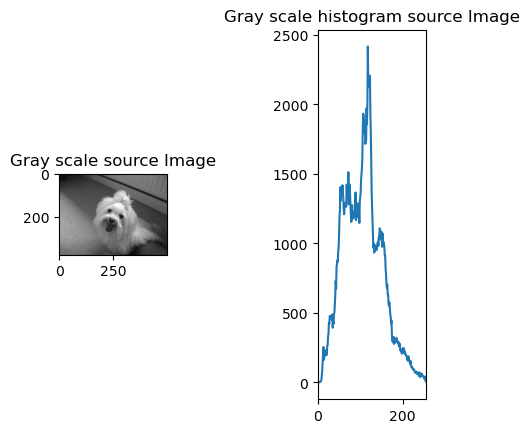

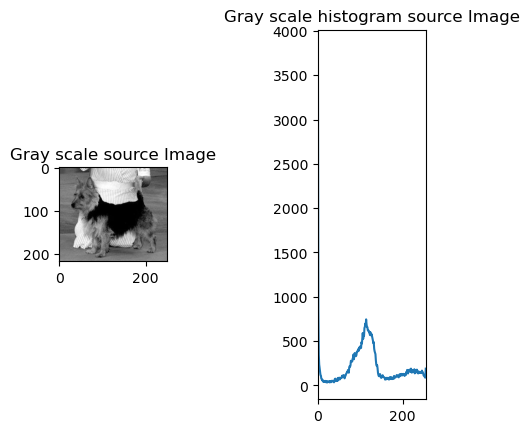

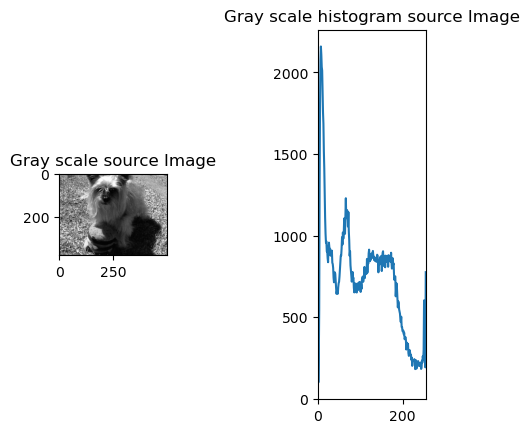

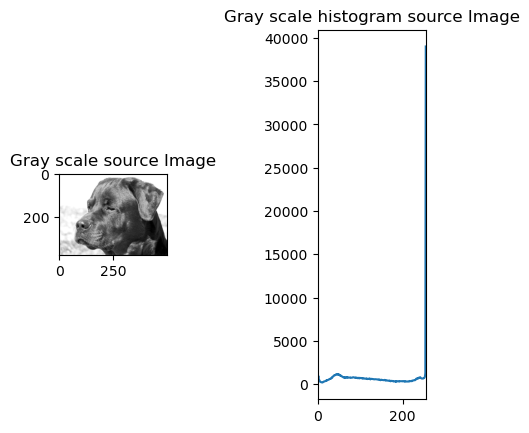

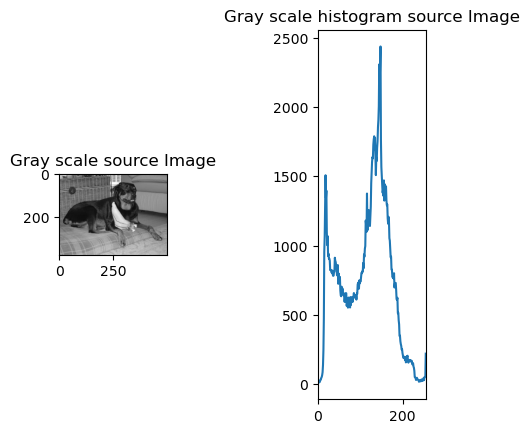

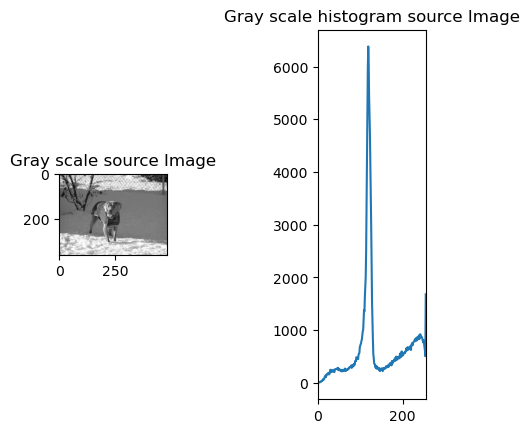

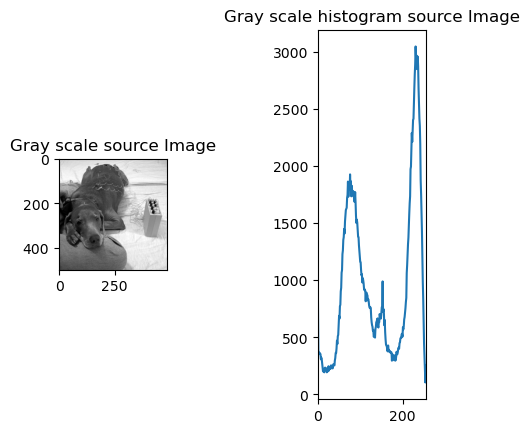

In [7]:
# plotting the first two images found in each bread
for bread in list(files_dict.keys()):
    files = files_dict[bread][0:2]
    for file in files:
        file = file.replace(bread+"/",bread+"/cropped_images/")
        image = cv.imread(file,cv.IMREAD_GRAYSCALE)
        plt.subplot(1,4,1)
        plt.imshow(image,cmap='gray')
        plt.title('Gray scale source Image')
        plt.subplot(1,4,3)
        hist,bin = np.histogram(image.ravel(),256,[0,255])
        plt.xlim([0,255])
        plt.plot(hist)
        plt.title('Gray scale histogram source Image')
        plt.show()

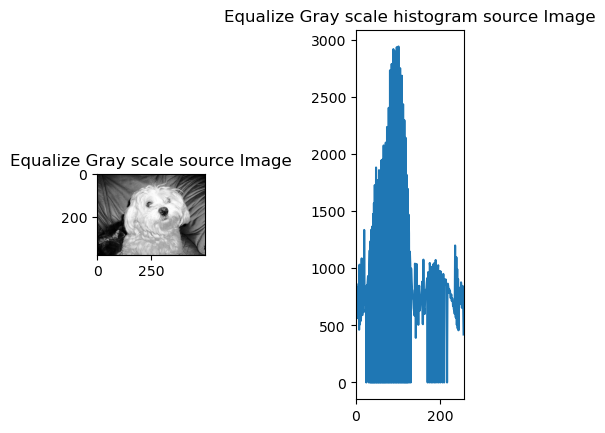

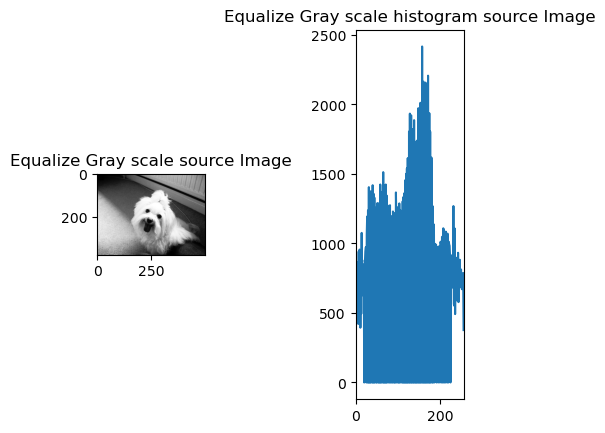

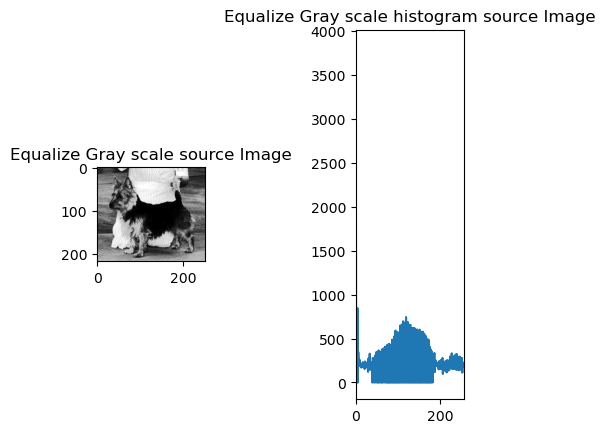

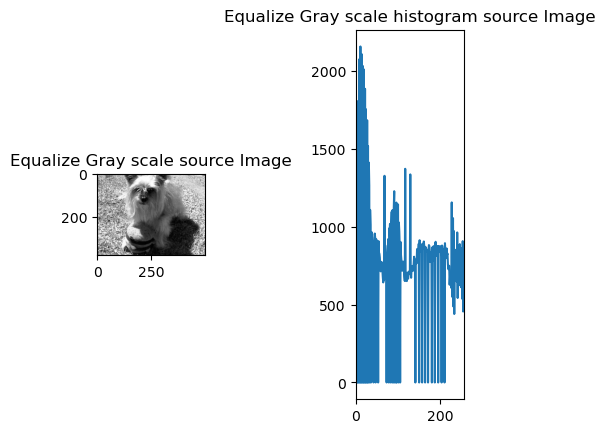

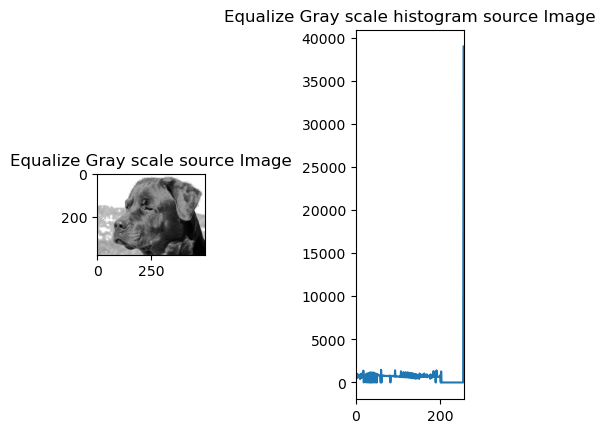

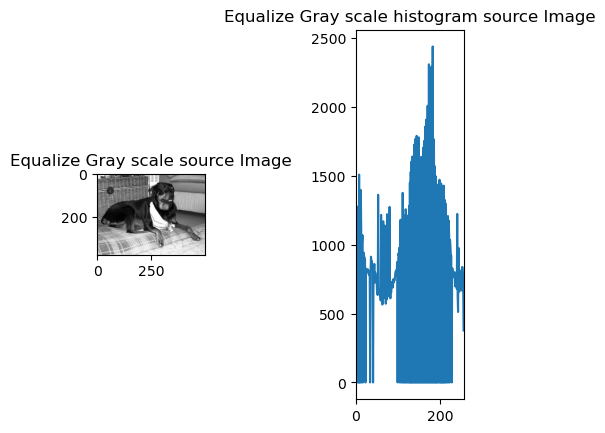

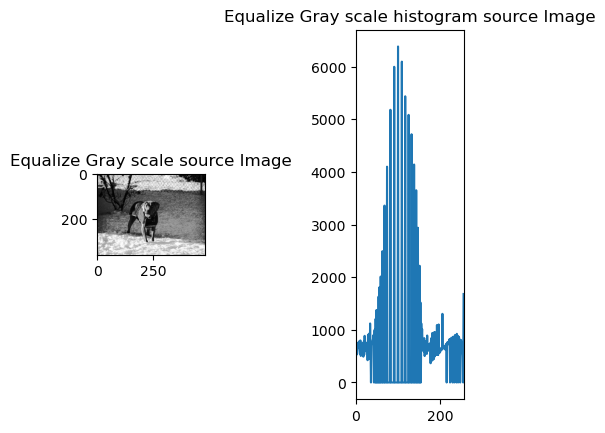

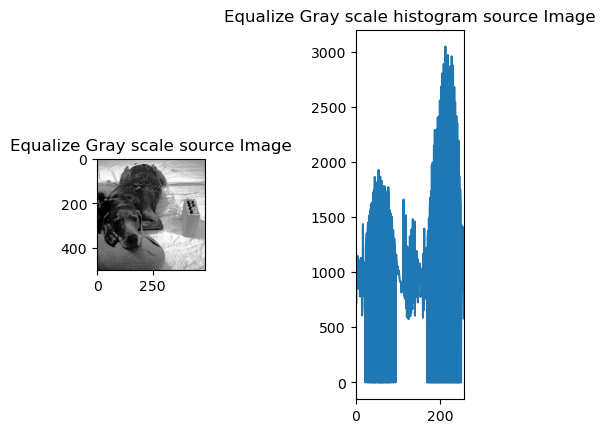

In [8]:
# plotting equalize histograms the first two images found in each bread
for bread in list(files_dict.keys()):
    files = files_dict[bread][0:2]
    for file in files:
        file = file.replace(bread+"/",bread+"/cropped_images/")
        image = cv.imread(file,cv.IMREAD_GRAYSCALE)
        image = cv.equalizeHist(image)
        plt.subplot(1,4,1)
        plt.imshow(image,cmap='gray')
        plt.title('Equalize Gray scale source Image')
        plt.subplot(1,4,3)
        hist,bin = np.histogram(image.ravel(),256,[0,255])
        plt.xlim([0,255])
        plt.plot(hist)
        plt.title('Equalize Gray scale histogram source Image')
        plt.show()

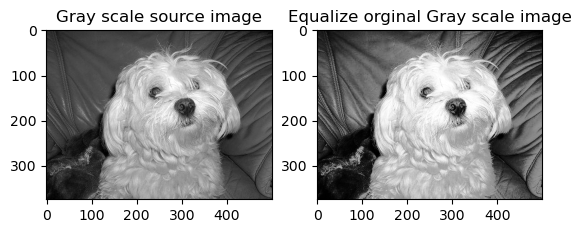

In [9]:
selected_image = files_dict["n02085936-Maltese_dog"][0]
selected_image = selected_image.replace("n02085936-Maltese_dog/","n02085936-Maltese_dog/cropped_images/")
image = cv.imread(selected_image,0)
equ_image = cv.equalizeHist(image)
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title('Gray scale source image')
plt.subplot(1,2,2)
plt.imshow(equ_image,cmap="gray")
plt.title('Equalize orginal Gray scale image')
plt.show()

## observation 

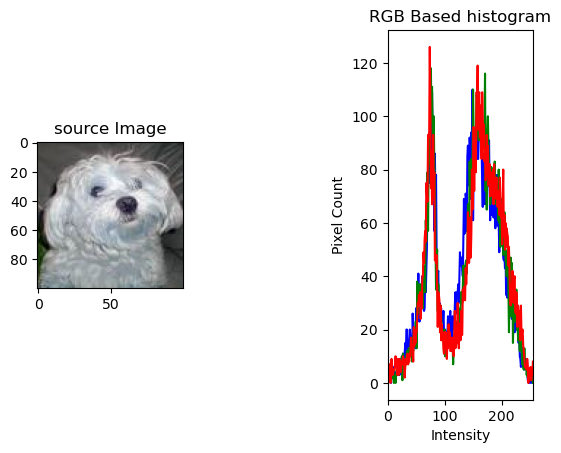

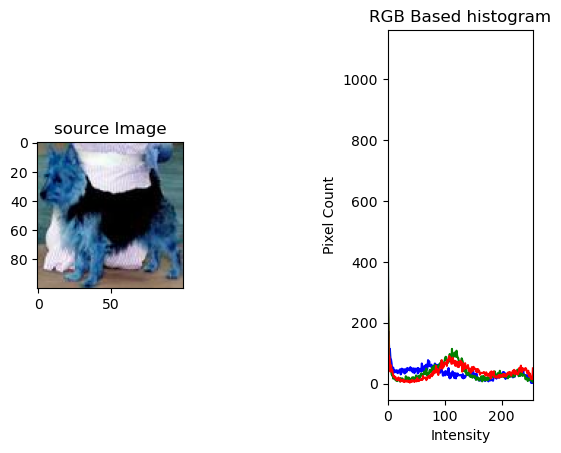

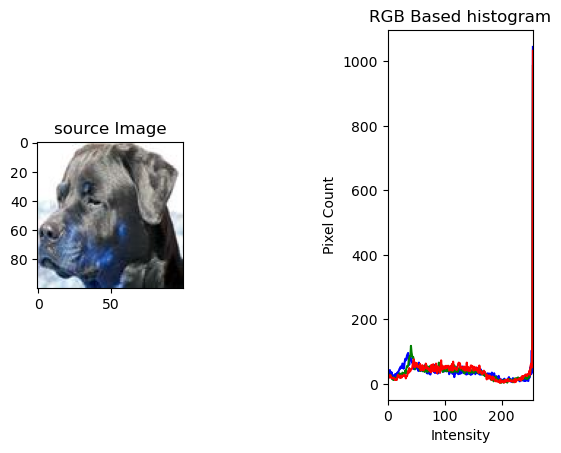

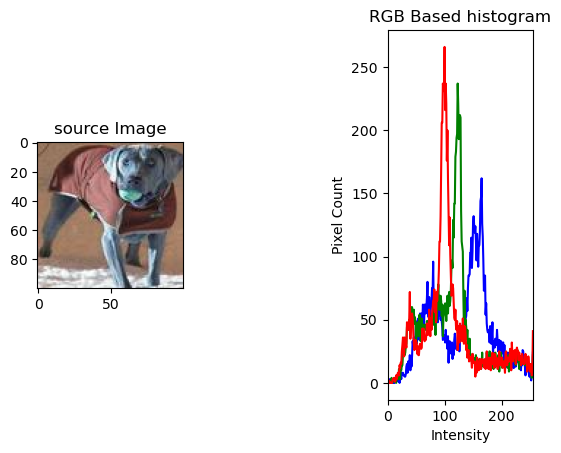

In [10]:
# plotting RGB histograms the first found image in each bread
for bread in list(files_dict.keys()):
    file = files_dict[bread][0]
    file = file.replace(bread+"\\",bread+"\\cropped_images\\")
    image = cv.imread(file)
    plt.subplot(1,3,1)
    plt.imshow(image)
    plt.title('source Image')
    plt.subplot(1,3,3)
    color = ('b','g','r')
    for index,value in enumerate(color):
        histogram = cv.calcHist([image],[index],None,[256],[0,256])
        plt.plot(histogram,color = value)
        plt.xlim([0,256])
        plt.title('RGB Based histogram')
        plt.xlabel("Intensity")
        plt.ylabel("Pixel Count")
    plt.show()

In [11]:
bread_chosen =['n02085936-Maltese_dog', 'n02096294-Australian_terrier']

In [12]:
#same class distance calculator
files = files_dict[bread_chosen[0]][0:2]
image_vector_representation =[]
for file in files:
    image = cv.imread(file)
    gray_scale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    hist = cv.calcHist([gray_scale_image],[0],None,[256],[0,256])
    image_vector_representation.append(hist)

print("Euclidean distance metrics calculation: ",cv.norm(image_vector_representation[0],\
                                                   image_vector_representation[1],normType=cv.NORM_L2))
print("Manhattan distance metrics calculation:",cv.norm(image_vector_representation[0],\
                                                  image_vector_representation[1],normType=cv.NORM_L1))
print("Bhattacharyya distance metrics calculation:",cv.compareHist(image_vector_representation[0],\
                                                             image_vector_representation[1],cv.HISTCMP_BHATTACHARYYA))
print("Histogram Intersection distance metrics calculation:",cv.compareHist(image_vector_representation[0],\
                                                                      image_vector_representation[1],cv.HISTCMP_INTERSECT))

Euclidean distance metrics calculation:  10803.583387006369
Manhattan distance metrics calculation: 120212.0
Bhattacharyya distance metrics calculation: 0.29555684413926364
Histogram Intersection distance metrics calculation: 127394.0


In [13]:
#different class distance calculator
files=[]
files.append(files_dict[bread_chosen[0]][0])
files.append(files_dict[bread_chosen[1]][0])
image_vector_representation =[]
for file in files:
    image = cv.imread(file)
    gray_scale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    hist = cv.calcHist([gray_scale_image],[0],None,[256],[0,256])
    image_vector_representation.append(hist)

print("Euclidean distance metrics calculation: ",cv.norm(image_vector_representation[0],\
                                                   image_vector_representation[1],normType=cv.NORM_L2))
print("Manhattan distance metrics calculation:",cv.norm(image_vector_representation[0],\
                                                  image_vector_representation[1],normType=cv.NORM_L1))
print("Bhattacharyya distance metrics calculation:",cv.compareHist(image_vector_representation[0],\
                                                             image_vector_representation[1],cv.HISTCMP_BHATTACHARYYA))
print("Histogram Intersection distance metrics calculation:",cv.compareHist(image_vector_representation[0],\
                                                                      image_vector_representation[1],cv.HISTCMP_INTERSECT))

Euclidean distance metrics calculation:  14110.096456084204
Manhattan distance metrics calculation: 161694.0
Bhattacharyya distance metrics calculation: 0.45004887720375086
Histogram Intersection distance metrics calculation: 40153.0


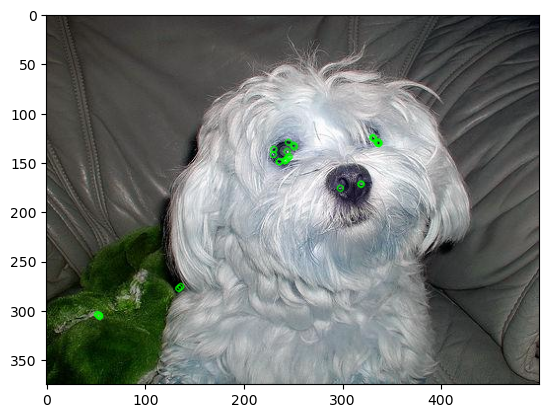

Key points extracted 30


In [14]:
#ORB implementation
bread_chosen ='n02085936-Maltese_dog'
file = files_dict[bread_chosen][0]
image = cv.imread(file)
orb = cv.ORB_create(edgeThreshold=2,patchSize=3, nlevels=8, fastThreshold=20,scaleFactor=1.2,\
                    WTA_K=2,scoreType=cv.ORB_HARRIS_SCORE,firstLevel=0, nfeatures=30)
kp = orb.detect(image,None)
img = cv.drawKeypoints(image, kp, None, color=(0,255,0))
plt.imshow(img)
plt.show()
print("Key points extracted "+str(len(kp)))

## observations

In [15]:
#PCA Implementation
bread_chosen =['n02085936-Maltese_dog', 'n02096294-Australian_terrier']
gray_scale_histogram_df = pd.DataFrame()
for bread in bread_chosen:
    for files in files_dict[bread]:
        image = cv.imread(files)
        gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        histogram = cv.calcHist([gray_image],[0],None,[256],[0,256])
        df = pd.DataFrame(histogram).T
        df['label']=bread
        gray_scale_histogram_df=pd.concat([gray_scale_histogram_df,df],ignore_index=True)

In [16]:
intrim_df = gray_scale_histogram_df.loc[:,:255]
std_scaler = StandardScaler()
intrim_df_standardization = pd.DataFrame(std_scaler.fit_transform(intrim_df), columns=intrim_df.columns) 
pca = PCA(n_components=2)
PCA_analysis = pca.fit_transform(intrim_df_standardization)

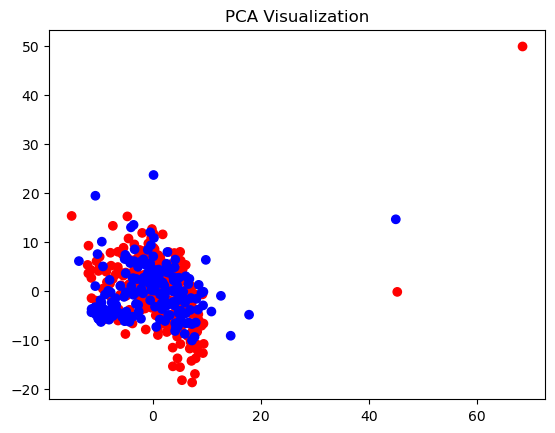

In [17]:
pca_df=pd.DataFrame(PCA_analysis)
color_list = [ "red" if i == 'n02085936-Maltese_dog' else "blue" for i in gray_scale_histogram_df['label'].tolist() ]
plt.title('PCA Visualization')
plt.scatter(pca_df[0].tolist(), pca_df[1].tolist(), c=color_list)
plt.show()